## Jakub Mijas 235924
# Projekt z przedmiotu Eksploracyjna Analiza Danych
### Głównym założeniem projektu jest przeanalizowanie danych dotyczących polskiej gastronomii, używając do tego metodologii poznanej na zajęciach z Eksploracyjnej Analizy Danych.

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cols = sns.color_palette("crest")
labels = ['Nazwa', '2001', '2002', '2003', '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

### Wczytywanie danych związanych z Przychodami z gałęzi gastronomii podzielonych na ogólny przychów,przychód ze sprzedaży produktów z wyłączeniem alkoholu i wyrobów tytoniowych opraz przychód związany ze sprzedażą alkoholu i wyrobów tytoniowych

In [285]:
df = pd.read_csv('Dane GUS\Przychody.csv',sep=';')
df = df.iloc[:, 1:-1]
df.head()

,Nazwa,ogółem;1999;[tys. zł],ogółem;2000;[tys. zł],ogółem;2001;[tys. zł],ogółem;2002;[tys. zł],ogółem;2003;[tys. zł],ogółem;2004;[tys. zł],ogółem;2005;[tys. zł],ogółem;2006;[tys. zł],ogółem;2007;[tys. zł],...,ze sprzedaży napojów alkoholowych i wyrobów tytoniowych;2011;[tys. zł],ze sprzedaży napojów alkoholowych i wyrobów tytoniowych;2012;[tys. zł],ze sprzedaży napojów alkoholowych i wyrobów tytoniowych;2013;[tys. zł],ze sprzedaży napojów alkoholowych i wyrobów tytoniowych;2014;[tys. zł],ze sprzedaży napojów alkoholowych i wyrobów tytoniowych;2015;[tys. zł],ze sprzedaży napojów alkoholowych i wyrobów tytoniowych;2016;[tys. zł],ze sprzedaży napojów alkoholowych i wyrobów tytoniowych;2017;[tys. zł],ze sprzedaży napojów alkoholowych i wyrobów tytoniowych;2018;[tys. zł],ze sprzedaży napojów alkoholowych i wyrobów tytoniowych;2019;[tys. zł],ze sprzedaży napojów alkoholowych i wyrobów tytoniowych;2020;[tys. zł]
0,POLSKA,4087276,4905841,4669511,4434489,4694253,5136343,7262600,8156721,9455252,...,1260968,1313658,1359772.0,1460634.5,1733931.0,1902611.9,1959121.9,2068655.6,2256329.7,1041160.7
1,DOLNOŚLĄSKIE,508653,572724,623630,573219,680908,697292,830349,949180,1155304,...,115511,104222,127093.7,135333.4,144479.8,147230.4,158243.1,152298.8,182062.5,88900.1
2,KUJAWSKO-POMORSKIE,92533,102706,106593,110330,130594,136076,173828,223901,294368,...,34514,32795,41303.1,35466.4,41863.2,51912.2,55673.8,59306.2,78390.0,36082.9
3,LUBELSKIE,90877,91620,99633,105478,107056,143409,173543,196175,214465,...,25746,28731,33823.1,33228.8,44710.5,49264.0,39155.8,42601.2,45379.1,25157.4
4,LUBUSKIE,71614,68201,82637,73289,86367,102001,127451,155726,188598,...,20969,18900,17423.6,19683.1,16537.1,25659.0,28686.2,27097.4,25295.7,14977.1


Aby dalsze przetwarzanie danych było nieco łatwiejsze podzielimy dane na trzy osobne dataframe'y oraz zastąpimy domyślne nagłówki tymi zawartymi w zmiennej labels.
Dodatkowo wyznaczymy dla pierwszego rzędu,czyli danych z całego kraju maksimum oraz minimum które w późniejszym czasie przydadzą nam się do wyskalowania wykresów

In [286]:
df_og = df.iloc[:, [0] + list(range(3, 24))]
df_og.columns = labels
min_val_og = df_og.iloc[:1, 1:].min().min()
max_val_og = df_og.iloc[:1, 1:].max().max()
print(f"Minimum value: {min_val_og}")
print(f"Maximum value: {max_val_og}")
df_og.head()

Minimum value: 4434489.0
Maximum value: 30017103.4


,Nazwa,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,POLSKA,4669511,4434489,4694253,5136343,7262600,8156721,9455252,10734791,11961955,...,14719951,15617247.3,17111889.3,19177590.9,22187755.4,24285734.7,26026718.1,30017103.4,19809451.9,27620208.1
1,DOLNOŚLĄSKIE,623630,573219,680908,697292,830349,949180,1155304,1356568,1606393,...,2116477,2346809.3,2612512.4,2873046.5,3243409.0,3655906.7,4016018.7,4787962.5,3488874.4,4683627.5
2,KUJAWSKO-POMORSKIE,106593,110330,130594,136076,173828,223901,294368,312310,407671,...,448416,517526.4,506990.4,621922.2,754865.4,789752.8,781157.3,784065.1,498219.8,704516.6
3,LUBELSKIE,99633,105478,107056,143409,173543,196175,214465,228186,237499,...,310785,323467.0,315495.8,370056.0,461470.7,435384.8,498105.2,577717.3,403397.6,530705.0
4,LUBUSKIE,82637,73289,86367,102001,127451,155726,188598,214108,205647,...,184107,183172.9,187408.1,208390.4,284290.2,327393.8,320882.3,375943.4,288698.0,390276.1


In [287]:
df_ba = df.iloc[:, [0] + list(range(26, 47))]
df_ba.columns = labels
min_val_ba = df_ba.iloc[:1, 1:].min().min()
max_val_ba = df_ba.iloc[:1, 1:].max().max()
print(f"Minimum value: {min_val_ba}")
print(f"Maximum value: {max_val_ba}")
df_ba.head()

Minimum value: 451046.0
Maximum value: 1591394.5


,Nazwa,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,POLSKA,498780,465388,454254,451046,691400,731081,872317,1049988,1040791,...,910101,1057349.4,1045829.8,1214635.3,1351731.1,1362277.8,1360738.7,1591394.5,905403.3,1049266.1
1,DOLNOŚLĄSKIE,35515,36635,36725,40843,49165,62031,57099,68320,62482,...,72853,84926.2,83061.5,109548.2,108192.1,128770.0,135546.5,151558.7,116387.5,76504.6
2,KUJAWSKO-POMORSKIE,15003,15326,14992,13756,22036,30890,61879,46948,46131,...,46647,55772.3,50734.9,70521.4,68104.6,69379.2,53093.5,44434.8,24860.4,37256.9
3,LUBELSKIE,13515,16694,13874,17821,22600,23804,25027,30550,24891,...,30497,30142.6,35178.1,35415.7,41396.0,36014.2,45276.1,42544.4,19028.9,20450.2
4,LUBUSKIE,11705,9375,10401,14364,15754,17952,17290,19183,20500,...,11905,14800.9,15187.0,14477.2,17728.9,16576.3,12843.8,15959.5,7995.3,11009.0


In [288]:
df_za =  df.iloc[:, [0] + list(range(48, 69))]
df_za.columns = labels
min_val_za = df_za.iloc[:1, 1:].min().min()
max_val_za = df_za.iloc[:1, 1:].max().max()
print(f"Minimum value: {min_val_za}")
print(f"Maximum value: {max_val_za}")
df_za.head()


Minimum value: 567387.0
Maximum value: 2256329.7


,Nazwa,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,POLSKA,NaN,603909,579819,567387,623922,932918,992659,1117781,1183379,...,1260968,1313658,1359772.0,1460634.5,1733931.0,1902611.9,1959121.9,2068655.6,2256329.7,1041160.7
1,DOLNOŚLĄSKIE,NaN,44572,49446,48936,62392,70198,79640,80525,97413,...,115511,104222,127093.7,135333.4,144479.8,147230.4,158243.1,152298.8,182062.5,88900.1
2,KUJAWSKO-POMORSKIE,NaN,17754,17307,19199,19103,27667,30546,37251,39227,...,34514,32795,41303.1,35466.4,41863.2,51912.2,55673.8,59306.2,78390.0,36082.9
3,LUBELSKIE,NaN,15440,14886,17998,23946,28003,30482,31143,31733,...,25746,28731,33823.1,33228.8,44710.5,49264.0,39155.8,42601.2,45379.1,25157.4
4,LUBUSKIE,NaN,19847,14176,16175,16718,21685,22073,25011,26551,...,20969,18900,17423.6,19683.1,16537.1,25659.0,28686.2,27097.4,25295.7,14977.1


Następnym krokiem jaki podejmiemy w dalszej analizie podanych danych będzie próba wizualizacji.
W tym przypadku dobrą metodą wizualizacji może okazać się wykres słupkowy, który po paru drobnych modyfikacjach pokaże nam jak na przestrzeni badanych lat prezentowały się przychody z tych kategorii

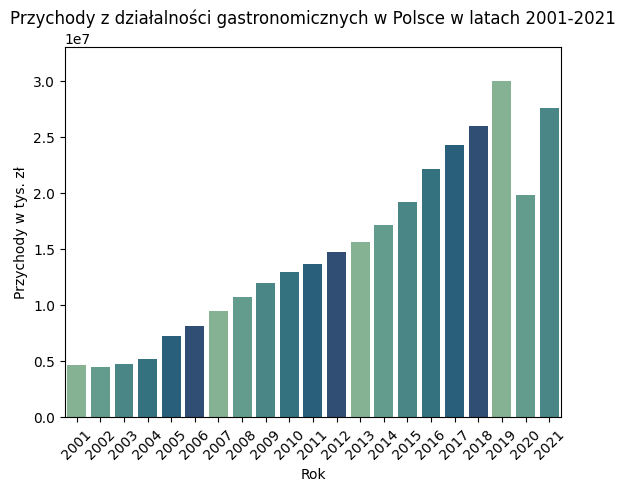

In [289]:
sns.barplot(data=df_og.iloc[:1,1:],palette=cols)
plt.title("Przychody z działalności gastronomicznych w Polsce w latach 2001-2021")

plt.xlabel('Rok')

plt.ylabel('Przychody w tys. zł')

plt.ylim(0,max_val_og+0.1*max_val_og)

plt.xticks(rotation=45)
plt.show()

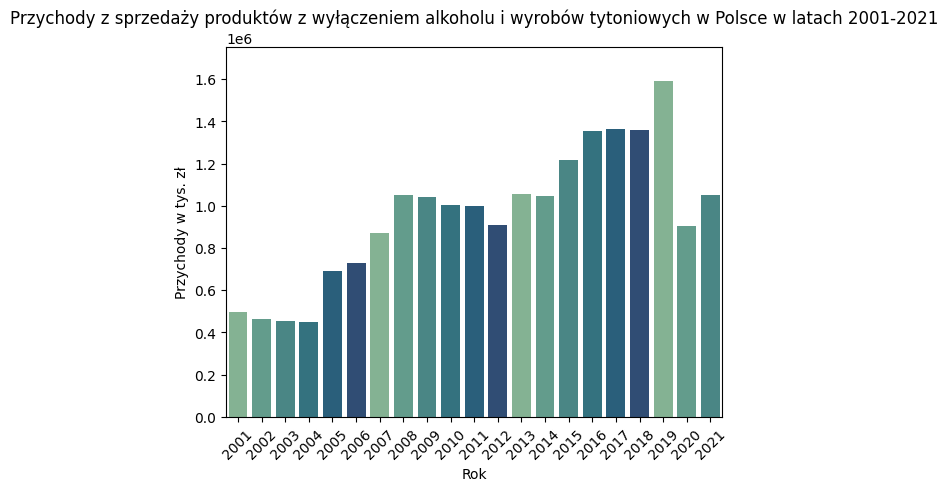

In [290]:
sns.barplot(data=df_ba.iloc[:1,1:],palette=cols)
plt.title("Przychody z sprzedaży produktów z wyłączeniem alkoholu i wyrobów tytoniowych w Polsce w latach 2001-2021")

plt.xlabel('Rok')

plt.ylabel('Przychody w tys. zł')

plt.ylim(0,max_val_ba+0.1*max_val_ba)

plt.xticks(rotation=45)
plt.show()

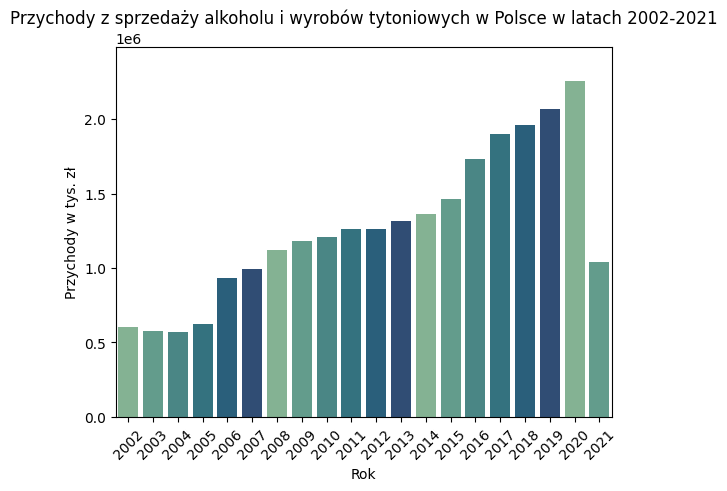

In [291]:
sns.barplot(data=df_za.iloc[:1,2:],palette=cols)
plt.title("Przychody z sprzedaży alkoholu i wyrobów tytoniowych w Polsce w latach 2002-2021")

plt.xlabel('Rok')

plt.ylabel('Przychody w tys. zł')

plt.ylim(0,max_val_za+0.1*max_val_za)

plt.xticks(rotation=45)
plt.show()

#### Wnioski wciągnięte z analizy przychodów
Spadek ogólnych przychodów w przypadku dwóch pierwszych kategorii przypada na rok 2020 jednak w przypadku sprzedaży napojów alkoholowych oraz wyrobów tytoniowych ten spadek opóźniony jest o rok i nie jesteśmy w stanie na tym etapie jednoznacznie stwierdzić co go powoduje.
Jednym z kierunków w jakim możemy podążyć będzie zbadanie stawek akcyzy w otoczeni roku 2020, czym zajmiemy się w dalszej częśći projektu.
Gastronomia jak możemy zaobserwować jest gałęzią, która przez większą część badanego przedziału czasowego wykazywała tendencje silnie rosnącą osiągając swoje maskimum w roku 2019. 

### Wczytywanie danych związanych z ilością placówek gastronomicznych podzielonych na cztery grupy: restauracje,bary,stołówki i punkty gastronomiczne

Same przychody z działalności gastronomicznych nie są jednak jedynymi danymi które należałoby wziąć pod uwagę, dość istotną kwestią jest to jak wiele placówek gastronomicznych znajdowało się w polsce na przestrzeni lat.
Dane do jakich udało mi się dotrzeć na platformie GUS dotyczą przedziału 2005-2021 i tym przedziałem właśnie się zajmiemy.
Podobnie jak w poprzednim przypadku cały zestaw danych podzielę na cztery części gdyż tyle właśnie mamy kategorii lokali gastronomicznych.
A są nimi restauracje, bary, stołówki oraz punkty gastronomiczne.
Dodatkowo stworzyłem na podstawie tych danych plik csv w którym zawarta jest sumaryczna ilość lokali gastronomicznych na terenie naszego państwa w latach 2005-2021.

In [292]:
labels_2 = ["Nazwa", "2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
df_2 = pd.read_csv('Dane GUS\Ilosc placowek.csv',sep=';')
df_2 = df_2.iloc[:, 1:-1]
df_2.head()

,Nazwa,restauracje;2005;[ob.],restauracje;2006;[ob.],restauracje;2007;[ob.],restauracje;2008;[ob.],restauracje;2009;[ob.],restauracje;2010;[ob.],restauracje;2011;[ob.],restauracje;2012;[ob.],restauracje;2013;[ob.],...,punkty gastronomiczne;2012;[ob.],punkty gastronomiczne;2013;[ob.],punkty gastronomiczne;2014;[ob.],punkty gastronomiczne;2015;[ob.],punkty gastronomiczne;2016;[ob.],punkty gastronomiczne;2017;[ob.],punkty gastronomiczne;2018;[ob.],punkty gastronomiczne;2019;[ob.],punkty gastronomiczne;2020;[ob.],punkty gastronomiczne;2021;[ob.]
0,POLSKA,3386,3510,3673,4150,4252,4625,4447,4806,5264,...,4083,4179,4934,5748,6089,6271,5798,6583,6033,6687
1,DOLNOŚLĄSKIE,357,281,311,358,392,414,413,420,450,...,277,235,260,290,273,289,298,262,223,296
2,KUJAWSKO-POMORSKIE,145,146,176,168,175,181,167,184,201,...,101,100,117,148,197,126,150,147,124,145
3,LUBELSKIE,98,91,93,110,110,123,137,146,177,...,104,83,108,110,153,131,99,120,106,102
4,LUBUSKIE,80,77,97,116,114,107,99,87,91,...,39,44,45,71,105,81,62,63,38,59


In [293]:
df_rest = df_2.iloc[:, :18]
df_rest.columns = labels_2
min_val_rest = df_rest.iloc[:1, 1:].min().min()
max_val_rest = df_rest.iloc[:1, 1:].max().max()
print(f"Minimum value: {min_val_rest}")
print(f"Maximum value: {max_val_rest}")
df_rest.head()

Minimum value: 3386
Maximum value: 5917


,Nazwa,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,POLSKA,3386,3510,3673,4150,4252,4625,4447,4806,5264,5615,5587,5917,5600,5034,5837,4970,5191
1,DOLNOŚLĄSKIE,357,281,311,358,392,414,413,420,450,456,491,504,536,480,518,433,470
2,KUJAWSKO-POMORSKIE,145,146,176,168,175,181,167,184,201,232,248,278,278,205,257,241,253
3,LUBELSKIE,98,91,93,110,110,123,137,146,177,187,189,249,195,197,205,165,144
4,LUBUSKIE,80,77,97,116,114,107,99,87,91,101,99,130,145,103,124,113,118


In [294]:
df_bar = df_2.iloc[:, [0] + list(range(18, 35))]
df_bar.columns = labels_2
min_val_bar = df_bar.iloc[:1, 1:].min().min()
max_val_bar = df_bar.iloc[:1, 1:].max().max()
print(f"Minimum value: {min_val_bar}")
print(f"Maximum value: {max_val_bar}")
df_bar.head()

Minimum value: 3554
Maximum value: 5829


,Nazwa,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,POLSKA,3554,3793,3669,3776,3817,3995,3828,4266,4484,4937,5413,5728,5442,5124,5829,5233,5200
1,DOLNOŚLĄSKIE,187,323,302,340,331,399,430,471,516,607,663,706,774,852,965,901,945
2,KUJAWSKO-POMORSKIE,117,137,155,136,118,154,149,174,170,212,217,308,235,182,184,154,165
3,LUBELSKIE,110,117,131,109,88,72,77,90,88,94,123,131,112,92,92,88,89
4,LUBUSKIE,77,80,112,113,107,108,86,80,73,88,105,107,106,70,100,65,66


In [295]:
df_stol = df_2.iloc[:, [0] + list(range(35, 52))]
df_stol.columns = labels_2
min_val_stol = df_stol.iloc[:1, 1:].min().min()
max_val_stol = df_stol.iloc[:1, 1:].max().max()
print(f"Minimum value: {min_val_stol}")
print(f"Maximum value: {max_val_stol}")
df_stol.head()

Minimum value: 1542
Maximum value: 2640


,Nazwa,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,POLSKA,2640,2471,2460,2077,2028,2088,1898,1982,1880,1839,1863,1889,1812,1744,2011,1542,1711
1,DOLNOŚLĄSKIE,135,119,130,116,119,145,106,136,140,158,138,143,136,154,199,167,163
2,KUJAWSKO-POMORSKIE,72,74,64,66,64,72,70,75,72,62,73,70,69,60,54,45,52
3,LUBELSKIE,285,248,256,229,213,227,193,125,84,54,85,82,54,39,47,29,48
4,LUBUSKIE,34,37,31,35,40,42,38,33,28,25,23,35,37,25,29,14,16


In [296]:
df_pkt = df_2.iloc[:, [0] + list(range(52, df_2.shape[1]))]
df_pkt.columns = labels_2
min_val_pkt = df_pkt.iloc[:1, 1:].min().min()
max_val_pkt = df_pkt.iloc[:1, 1:].max().max()
print(f"Minimum value: {min_val_pkt}")
print(f"Maximum value: {max_val_pkt}")
df_pkt.head()

Minimum value: 2292
Maximum value: 6687


,Nazwa,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,POLSKA,2292,2449,2506,3066,3208,3700,3713,4083,4179,4934,5748,6089,6271,5798,6583,6033,6687
1,DOLNOŚLĄSKIE,100,116,141,161,154,261,269,277,235,260,290,273,289,298,262,223,296
2,KUJAWSKO-POMORSKIE,78,57,69,66,81,117,101,101,100,117,148,197,126,150,147,124,145
3,LUBELSKIE,91,142,96,83,95,87,104,104,83,108,110,153,131,99,120,106,102
4,LUBUSKIE,34,35,40,22,37,40,28,39,44,45,71,105,81,62,63,38,59


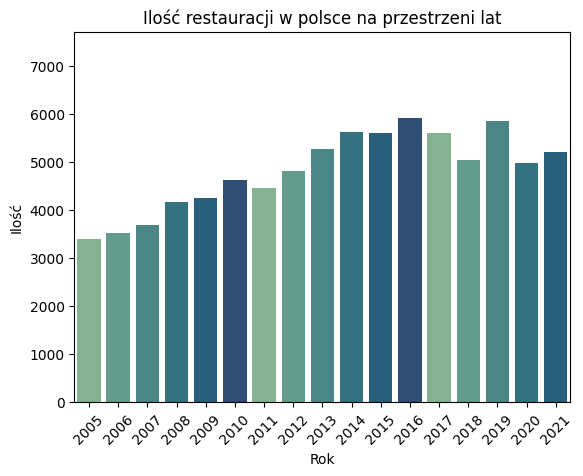

In [297]:
sns.barplot(data=df_rest.iloc[:1,1:],palette=cols)
plt.title("Ilość restauracji w Polsce na przestrzeni lat")

plt.xlabel('Rok')

plt.ylabel('Ilość')

plt.ylim(0,max_val_rest+0.3*max_val_rest)

plt.xticks(rotation=45)
plt.show()

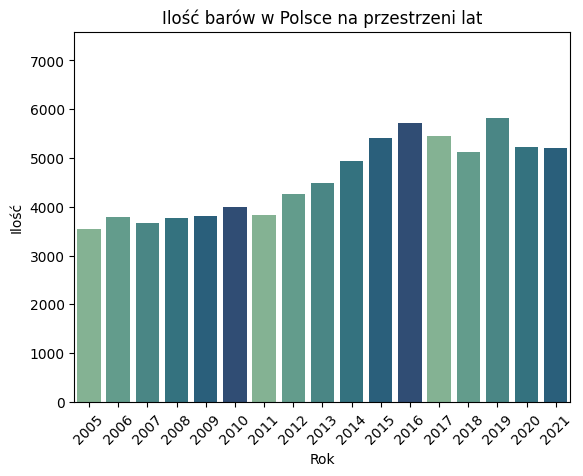

In [298]:
sns.barplot(data=df_bar.iloc[:1,1:],palette=cols)
plt.title("Ilość barów w Polsce na przestrzeni lat")

plt.xlabel('Rok')

plt.ylabel('Ilość')

plt.ylim(0,max_val_bar+0.3*max_val_bar)

plt.xticks(rotation=45)
plt.show()

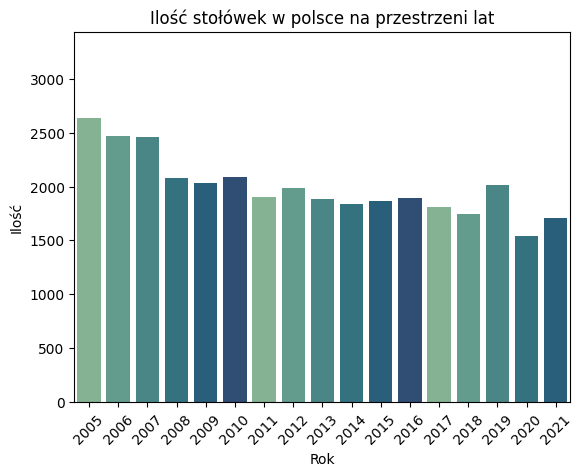

In [299]:
sns.barplot(data=df_stol.iloc[:1,1:],palette=cols)
plt.title("Ilość stołówek w Polsce na przestrzeni lat")

plt.xlabel('Rok')

plt.ylabel('Ilość')

plt.ylim(0,max_val_stol+0.3*max_val_stol)

plt.xticks(rotation=45)
plt.show()

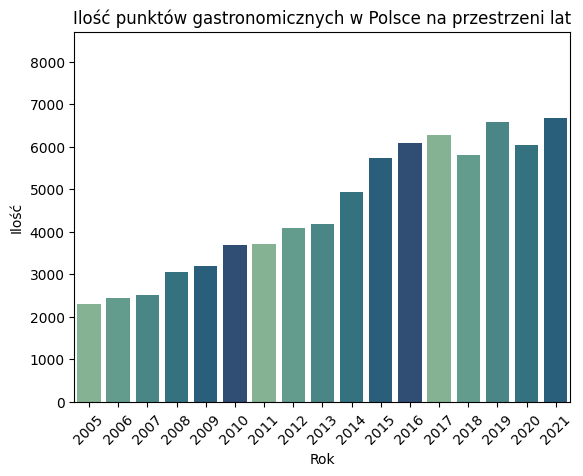

In [307]:
sns.barplot(data=df_pkt.iloc[:1,1:],palette=cols)
plt.title("Ilość punktów gastronomicznych w Polsce na przestrzeni lat")

plt.xlabel('Rok')

plt.ylabel('Ilość')

plt.ylim(0,max_val_pkt+0.3*max_val_pkt)

plt.xticks(rotation=45)
plt.show()

Tym razem jednak wykresy słupkowe nie mówią nam zbyt wiele o tym jak na przestrzeni lat wyglądała ilość lokali, jest to spowodowane prawdopodobnie różnym przeskalowaniem wyżej wymienionych wykresów.
Można jednak zaobserwować, że stołówkom w Polsce od 2005 roku towarzyszy tendencja spadkowa wyjątkiem jest rok 2019 który wyraźnie odstaje względem sąsiadujących słupków.
Odwrotna sytuacja ma miejsce w przypadku punktów gastronomicznych które od 2005 roku zwiększyły swoją liczebność blisko trzykrotnie.
Liczba barów po tendencji wzrostowej w latach 2011-2016 uległa względnej stabilizacji.
Aby jednak zaobserwować ogólne tendencje wzrostowe i spadkowe w liczbie lokali gastronomicznych zobrazujemy je za pomocą wykresu liniowego łącznej liczby placówek gastronomicznych.

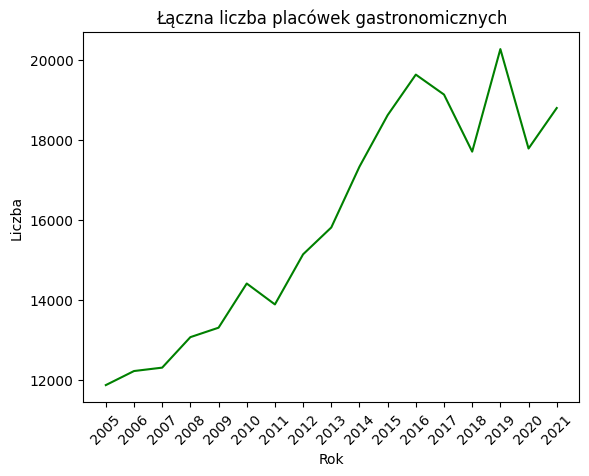

In [301]:
df_sum = pd.read_csv('Dane GUS\placówki_łącznie.csv')
df_sum.head()


plt.plot(df_sum.columns[1:], df_sum.iloc[0, 1:], color='green')
plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Łączna liczba placówek gastronomicznych')

plt.xticks(rotation=45)

plt.show()

Ta forma wizualizacji wskazuje nam dwa godne uwagi punktu spadkowe są nimi lata 2018 oraz 2020 , w dalszej części projektu postaramy dowiedzieć się czy to przypadek czy może jednak istnieje za tymi spadkami jakaś przyczyna.

### Pare słów o akcyzie
Aby przyjżeć się dokładnie dlaczego w roku 2021 nastęuje tak gwałtowny spadek przychodu związanego z sprzedażą alkoholu i wyrobów tytoniowych, odwołamy się do wartości dość specjalnego rodzaju podatku który często definiuje wzrosty cen tych artykułów,.
Mowa tu oczywiście o akcyzie której te produkty podlegają.
W dalszej częśći zbadamy jak w ostatnich sześciu latach wyglądały zmiany w stawkach tego podatku.

In [309]:
df_akcyza = pd.read_csv('Dane GUS\\akcyzy.csv')
df_akcyza.head(9)

,Nazwa porduktu,2017,2018,2019,2020,2021,2022
0,alkohol etylowy,5704.00,5704.00,5704.00,6275.00,6275.00,6903.00
1,piwo,7.79,7.79,7.79,8.57,8.57,9.43
2,wino,158.00,158.00,158.00,174.00,174.00,191.00
3,napoje fermentowane,158.00,158.00,158.00,174.00,174.00,191.00
4,cydr i perry o mocy < 5% obj.,97.00,97.00,97.00,97.00,97.00,97.00
5,wyroby pośrednie,318.00,318.00,318.00,350.00,350.00,385.00
6,papierosy,206.76,206.76,206.76,228.10,228.10,228.10
7,tytoń do palenia,141.29,141.29,141.29,155.79,155.79,155.79
8,cygara i cygaretki,393.00,393.00,393.00,433.00,433.00,433.00


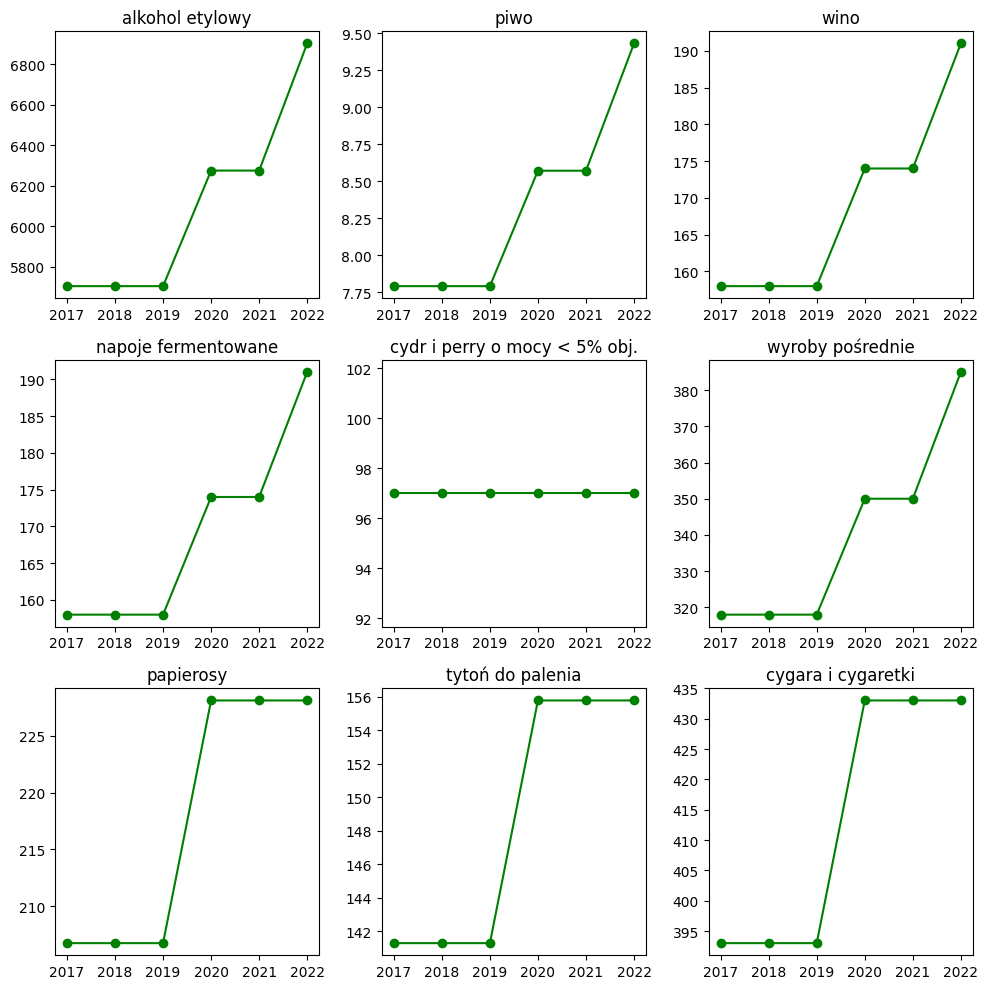

In [303]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i, row in df_akcyza.iterrows():
    ax = axs[i//3][i%3]
    ax.plot(row[1:], 'o-' , color='green')
    ax.set_title(row[0])
plt.tight_layout()
plt.show()

Dane jasno pokazują czym tak naprawdę spowodowany był padek przychodu związany z sprzedażą alkoholu roza wyrobów tytoniowych.
A patrząc na stawki jakie weszły w życie wraz z początkiem 2022 roku możemy spodziewać się kolejnego spadku związanego z tą częścią dochodu przemysłu gastronomicznego, no chyba że wszystkie bary zaczną serwować cydr.


### Parę słów o cenach
Pierwszym dość logicznym pomysłem na to czemu lokale gastronomiczne się zamykają jest brak opłacalności w prowadzeniu takiej działalności.
A więc należałoby zweryfikować czy to faktczynie ceny artykułów spożywczych okazały się gwoździem do trumny wielu działalności.
Analizie zostanie poddanych 9 produktów które moim zdaniem są istotne w większości placówek gastronomicznych a są nimi:
<ul>
    <li>Jaja kurze</li>
    <li>Cukier biały</li>
    <li>Chleb mieszany</li>
    <li>Mąka pszenna</li>
    <li>Olej rzepakowy</li>
    <li>Masłoy</li>
    <li>Mięso wieprzowe</li>
    <li>Mięso wołowe</li>
    <li>Mięso z kurczaka</li>  
</ul>

In [308]:
df_ceny = pd.read_csv('Dane GUS\ceny_produktów.csv')
df_ceny.columns = labels
df_ceny

,Nazwa,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,jaja kurze szt.,0.29,0.25,0.27,0.34,0.21,0.20,0.21,0.23,0.27,...,0.41,0.32,0.29,0.30,0.26,0.35,0.32,0.30,0.32,0.37
1,cukier biały 1kg,2.11,2.10,1.82,2.62,2.58,2.64,2.50,2.19,2.52,...,3.25,3.07,2.08,1.91,2.37,2.33,1.63,1.67,1.91,2.01
2,chleb mieszany 1kg,2.33,2.28,2.20,2.27,2.29,2.32,2.69,3.12,3.16,...,3.75,3.89,3.92,3.98,3.96,4.01,4.13,4.41,4.68,4.97
3,mąka pszenna 1kg,0.99,0.87,0.85,0.98,0.69,0.80,1.08,1.14,0.84,...,1.32,1.30,1.10,1.07,0.97,1.04,1.11,1.18,1.17,1.44
4,olej rzepakowy 1l,2.59,2.36,2.61,3.38,3.23,3.22,3.63,4.54,4.33,...,5.50,5.21,5.24,5.46,4.84,4.97,4.50,4.43,4.66,5.49
5,masło 82.5% 1kg,8.83,9.20,9.72,12.09,11.20,11.30,12.58,11.70,12.68,...,15.95,17.23,17.05,15.15,16.19,22.85,23.89,21.00,19.17,22.20
6,łopatka wieprzowa z kością 1kg,9.93,9.56,7.67,8.72,8.46,8.30,8.20,8.68,9.65,...,10.98,11.03,10.61,9.81,9.70,10.23,10.08,11.27,12.69,12.13
7,rosftbef wołowy z kością 1kg,9.57,9.67,9.82,12.42,14.40,15.13,15.84,17.31,19.01,...,25.51,25.95,25.07,24.82,25.11,25.30,25.79,25.92,25.55,26.98
8,kurczęta patroszone 1kg,5.24,4.36,4.58,4.97,4.90,4.23,5.41,5.37,5.88,...,6.50,6.55,6.32,6.07,5.92,6.05,6.22,6.22,5.95,7.27


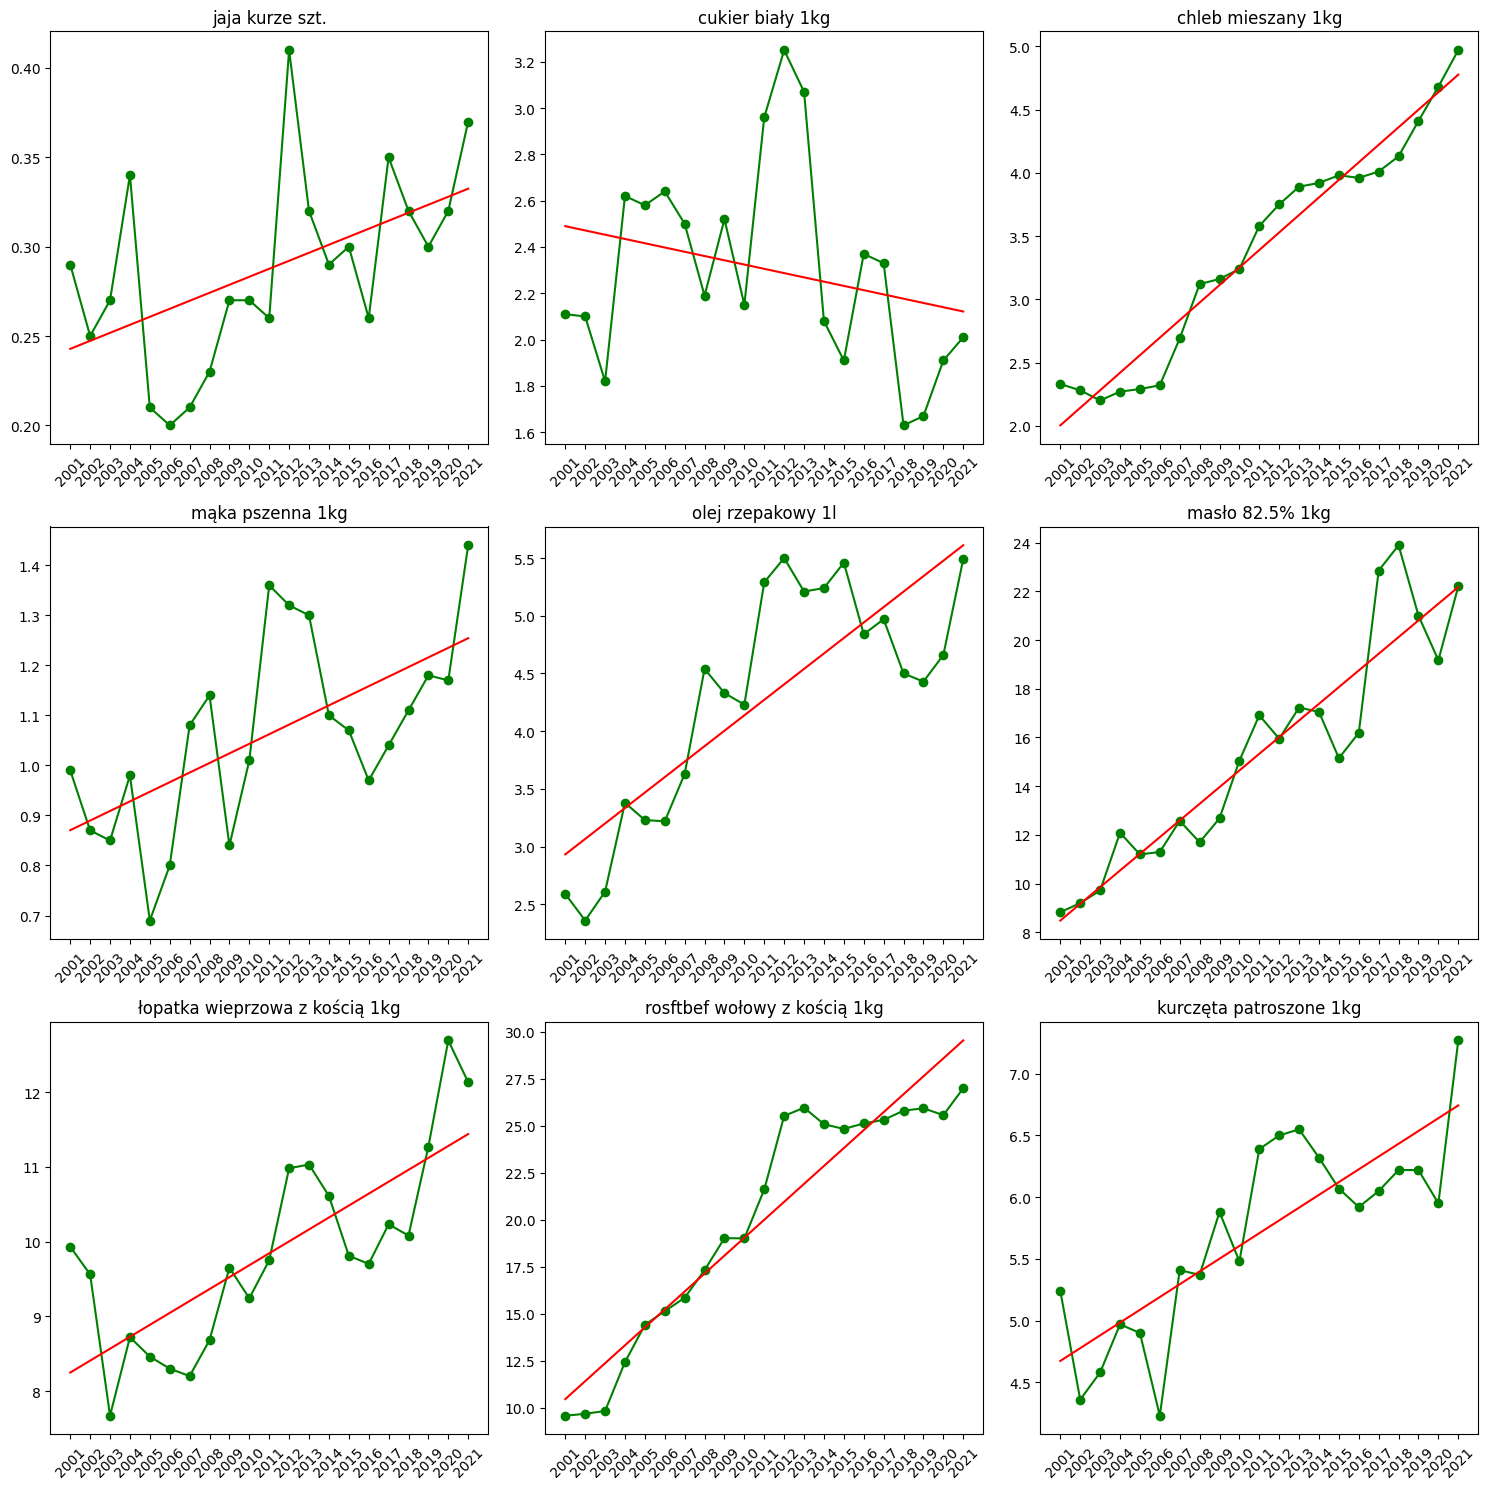

In [305]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i, row in df_ceny.iterrows():
    ax = axs[i//3][i%3]
    ax.plot(row[1:], 'o-',color='green')
    ax.set_title(row[0])
    ax.tick_params(axis='x', rotation=45)

    x = np.arange(len(y))
    y = row[1:].astype(float)
    p = np.polyfit(x, y, deg=1)
    ax.plot(x, np.polyval(p, x), color='red')

plt.tight_layout()
plt.show()

### Wnisoki wyciągnięte z analizy cen
<ul>
    <li>Jedynym produktem który w badanym przedziale nie przejawiał trednu wzrostowego był cukier który po wysokim peak'u w 2012 wykazywał nawet tendecję spadkową</li>
    <li>Mięso wieprzowe oraz drób a także mąka pszenna w ostatnich latach zanotowały znaczący wzrost cen</li>
    <li>Natomiast chleb w prawie całym badanym przedziale wykazywał zachowanie rosnące, które niekoniecznie skorelowane są z ceną mąki pszennej i jajek</li>
</ul>

### Parę słów o inflacji
Skoro analiza cen nie pokazała nam nic jednoznacznie możemy przyjżeć się jeszcze jednemu czynnikowy który jest dość istotny w dziale usługowym.
Gdy współczynnik inflacji względem poprzedniego roku jest znacząco wyższy informuje nas to oczywiście o faktycznej stracie wartości pieniądza jednak bardziej istotną kwestią jest idący wraz z tym wzrost cen a co za tym idzie klienci często są wtedy mniej skorzy do jedzenia w restauracjach, co objawia się zmniejszonymi obrotami w takich działalnościach
Poniżej przedstawiam dane zebrane w latach 2001-2021, które dotyczą wysokości współczynnika inflacji czyli jego wzrostu lub spadku względem lat poprzednich.

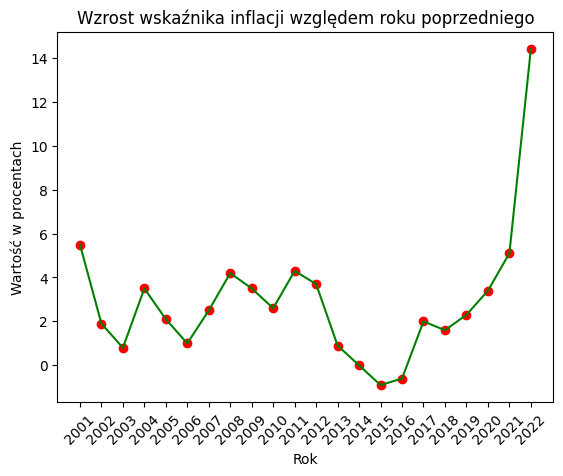

In [306]:
df_inflacja = pd.read_csv('Dane GUS\inflacja.csv')
df_inflacja.shape


x = df_inflacja.columns[1:]
y = df_inflacja.iloc[0, 1:]

plt.scatter(x, y , color='red')
plt.plot(x,y , color='green')
plt.xlabel('Rok')
plt.ylabel('Wartość w procentach')
plt.title('Wzrost wskaźnika inflacji względem roku poprzedniego')

plt.xticks(rotation=45)

plt.show()

Jak można zauważyć na przestrzeni lat 2017-2022 inflacja bezustannie rośnie i w 2022 roku przekroczył granicę 14% co za tym idzie częściową przyczyną osatnich spadków w przychodach ogólnych gałęźi gastronomicznej może być właśnie rosnąca inflacja oraz wiążące się z nim wzrosty cen, które bardzo skutecznie odstraszają potencjalnych klientów.

### Lockdown i jego wpływy na całe dane

Najbardziej oczywistą przyczyną spadku liczby lokali gastronomicznych w roku 2020 jest epidemia SARS-CoV-2 w wyniku której większość państw na świecie było zmuszonych do zastosowania izolacji w stosunku do swoich obywateli.Logicznym jest, że gdy ludzie nie mogli opuszczać domów restauracje, bary oraz inne lokale świeciły pustkami, nie generując przy tym żadnych przychodów.
Na taką sytuację wielu właścicieli nie było przygotowanych i nawet z pomocą rządowych programów dofinansowujących byli oni zmuszeni do zamknięcia swojej działalności,

### Wykorzystane dane
<ul>
    <li>https://dane.gov.pl/pl/dataset/505,stawki-akcyzy</li>
    <li>https://bdl.stat.gov.pl/bdl/dane/podgrup/temat</li>
</ul>

